C:\Users\User\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


訓練完成！均方誤差 (MSE): 4.66
範例預測：
南北 30 輛, 東西 5 輛 -> AI 建議綠燈: 53.0 秒 (理想約 52.5秒)
南北 10 輛, 東西 40 輛 -> AI 建議綠燈: 10.3 秒 (理想約 10.0秒)


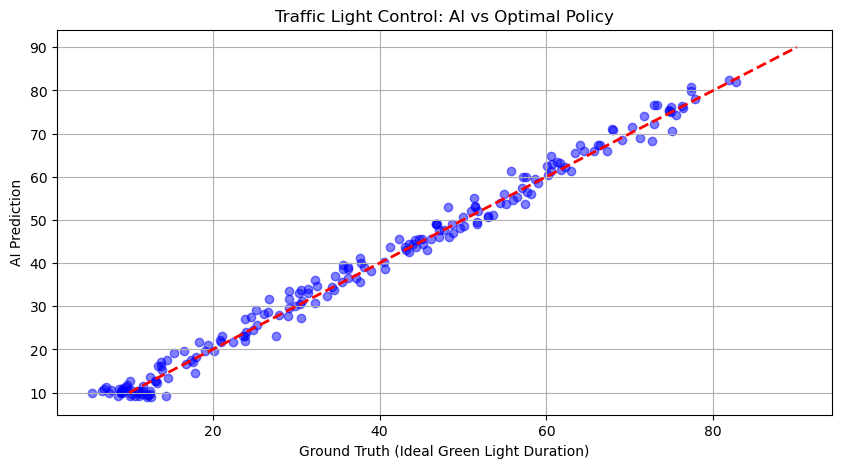

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# --- 1. 資料生成 (Data Generation) ---
# 模擬 "上帝視角" 的最佳策略：車越多，綠燈越久；但若橫向車也多，就要取平衡
def optimal_traffic_control(n_ns, n_ew):
    base_time = 10  # 基礎綠燈秒數
    # 簡單邏輯：主要看南北向車流，但如果東西向車流太多，會稍微縮減南北向時間以免東西向塞死
    time = base_time + (n_ns * 1.5) - (n_ew * 0.5)
    # 限制綠燈時間在 10 ~ 90 秒之間
    return np.clip(time, 10, 90)

# 生成 1000 筆隨機路口狀況
np.random.seed(42)
X = np.random.randint(0, 50, (1000, 2))  # [南北車數, 東西車數]
y = np.array([optimal_traffic_control(x[0], x[1]) for x in X]) # 理想秒數

# 加入一點隨機雜訊 (模擬真實世界的數據不完美)
y += np.random.normal(0, 2, 1000)

# 切分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. 模型建立與訓練 (Model Training) ---
# 使用簡單的神經網路 (MLP)
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, learning_rate_init=0.01)
model.fit(X_train, y_train)

# --- 3. 結果驗證 (Validation) ---
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"訓練完成！均方誤差 (MSE): {mse:.2f}")
print("範例預測：")
print(f"南北 30 輛, 東西 5 輛 -> AI 建議綠燈: {model.predict([[30, 5]])[0]:.1f} 秒 (理想約 52.5秒)")
print(f"南北 10 輛, 東西 40 輛 -> AI 建議綠燈: {model.predict([[10, 40]])[0]:.1f} 秒 (理想約 10.0秒)")

# --- 4. 畫圖 (Plotting) ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([10, 90], [10, 90], 'r--', lw=2) # 完美預測線
plt.xlabel("Ground Truth (Ideal Green Light Duration)")
plt.ylabel("AI Prediction")
plt.title("Traffic Light Control: AI vs Optimal Policy")
plt.grid(True)
plt.show()